<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title : P56 - Code Neural Network from Scratch

#### Name: 

#### IC Number:

#### Date :

#### Introduction : 



#### Conclusion :






Code/Tutorial taken from: https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6m combining with additional code/examples from  https://github.com/umbertogriffo/Minimalistic-Multiple-Layer-Neural-Network-from-Scratch-in-Python
        

First, create a Neural Network class as follow:

In [1]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)


The training of a Neural Network involves the following:

Each iteration of the training process consists of the following steps:
* Calculating the predicted output ŷ, known as feedforward
* Updating the weights and biases, known as backpropagation

The sequential graph below illustrates the process:
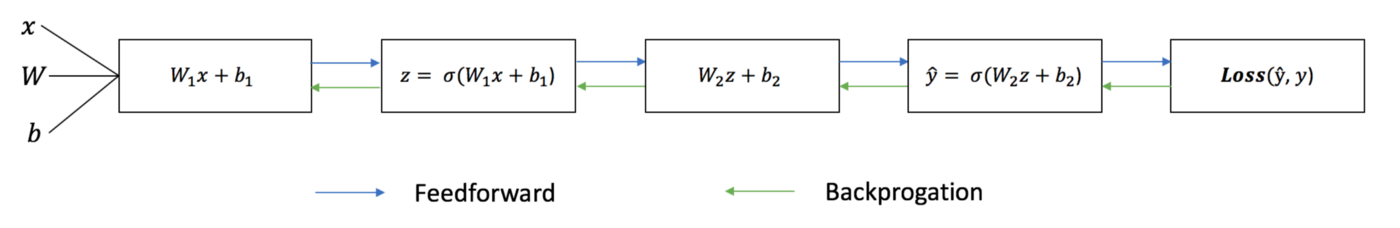


### Feedforward
As we’ve seen in the sequential graph above, feedforward is just simple calculus and for a basic 2-layer neural network, the output of the Neural Network is:
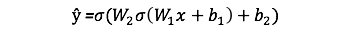
In the code, the feedforward function does exactly that. Note that for simplicity, we have assumed the biases to be 0.

In [2]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2


### Loss Function
There are many available loss functions, and the nature of our problem should dictate our choice of loss function. In this tutorial, we’ll use a simple sum-of-sqaures error as our loss function.

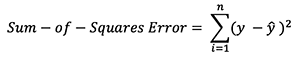

That is, the sum-of-squares error is simply the sum of the difference between each predicted value and the actual value. The difference is squared so that we measure the absolute value of the difference.

Our goal in training is to find the best set of weights and biases that minimizes the loss function.

### Backpropagation
Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

Recall from calculus that the derivative of a function is simply the slope of the function.
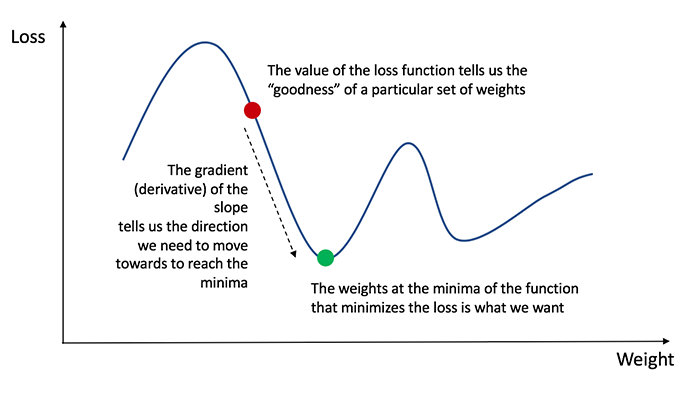



If we have the derivative, we can simply update the weights and biases by increasing/reducing with it(refer to the diagram above). This is known as gradient descent.

However, we can’t directly calculate the derivative of the loss function with respect to the weights and biases because the equation of the loss function does not contain the weights and biases. Therefore, we need the chain rule to help us calculate it.
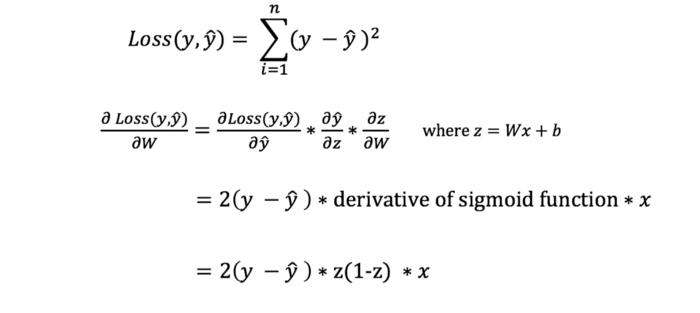

In [3]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
    
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

To train you may add the function train()


In [4]:
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.rand(self.input.shape[1],4) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np. zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*sigmoid_derivative(self.output), self.weights2.T)*sigmoid_derivative(self.layer1))
    
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()

Now to complete it, let's add a few more things:

In [5]:
# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

In [6]:
# Imports
import numpy as np 
      
# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)


In [7]:
NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedforward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.68781002]
 [0.72528463]
 [0.71881966]
 [0.74291131]]
Loss: 
0.29488269023583025


for iteration # 100

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.3768095 ]
 [0.54549346]
 [0.57371247]
 [0.55084617]]
Loss: 
0.20842853767605207


for iteration # 200

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.21123793]
 [0.78741432]
 [0.78823115]
 [0.25707057]]
Loss: 
0.05018636467275912


for iteration # 300

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.14673402]
 [0.88774961]
 [0.88887079]
 [0.12662798]]
Loss: 
0.01562884218505589


for iteration # 400

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 